In [29]:
import os
cwd = os.getcwd()
print(cwd)

/home/xchen/project2/deepjanus/DeepJanus-MNIST


# 1. Try vectorization tools here

Text(0.5, 1.0, 'Label5')

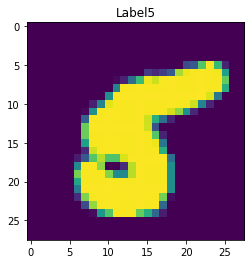

In [30]:
import h5py
import matplotlib.pyplot as plt
from config import NGEN, \
    POPSIZE, INITIALPOP, \
    RESEEDUPPERBOUND, GENERATE_ONE_ONLY, DATASET, \
    STOP_CONDITION, STEPSIZE, DJ_DEBUG, MUTATION_TYPE
import numpy as np
# Load the dataset.
hf = h5py.File(DATASET, 'r')
x_test = hf.get('xn')
x_test = np.array(x_test)
y_test = hf.get('yn')
y_test = np.array(y_test)

x = x_test[2]
y = y_test[2]
x_test,y_test

    
plt.imshow(x)
plt.title("Label"+str(y))

Try vectorization tools here

----------------------PATH--------------------
 M 7.404762938991784,22.49499392338388 C 6.206580520603039,20.666336414822457 6.054057178581086,19.63979137176898 6.839859105913968,18.692957972948975 C 7.431900659115331,17.979591542348643 7.672766999545206,16.464663000238666 7.375117640202579,15.326450101593462 C 6.702993234394404,12.75624242543823 10.899095718682442,8.279314645975393 14.785249604893197,7.420393048309222 C 16.27836232220194,7.090383790261804 18.95370229012001,6.378796635811475 20.730449533600023,5.839088260641825 C 26.550312410308223,4.071234814731198 28.13487461851095,7.473978564945293 22.75,10.175940857662285 C 20.9625,11.072852659773504 18.693094182443424,12.068507983854504 17.706875960985386,12.388508244508952 C 16.272205109958957,12.854018854932535 16.12227689242255,13.359959371605001 16.956875960985386,14.91942199603282 C 18.36159940522061,17.544171760868466 18.27718436493418,22.322815635065822 16.799999999999997,23.8 C 14.600073044053723,25.999926955946275 9.21079

Text(0.5, 1.0, 'Control Points')

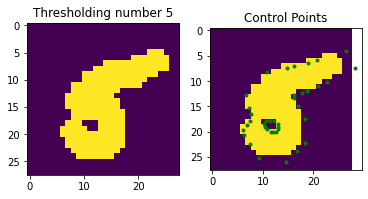

In [31]:
from vectorization_tools import *

# thresholding
bw = preprocess(x)
plt.subplot(1,2,1)
plt.imshow(bw)
plt.title("Thresholding number "+str(y))

# vertorizing
# Create a bitmap from the array
bmp = potrace.Bitmap(bw)
# Trace the bitmap to a path
path = bmp.trace()
desc = createSVGpath(path)
print(path)
print("----------------------PATH--------------------")
print(desc)
print("----------------------DESC--------------------")
print(create_svg_xml(desc)) # also the result of vectorize(x)
print("----------------------Control Points--------------------")
control_points = getSVGpathControlPoints(path) # also the result of getImageControlPoints(x)
print(control_points)
plt.subplot(1,2,2)
plt.imshow(bw)
for point in control_points:
    plt.plot(point[0],point[1],marker = ".",color = "g")
plt.title("Control Points")

The following code shows that there is no corner...

Text(0.5, 1.0, 'mid (red) and end (green) Points')

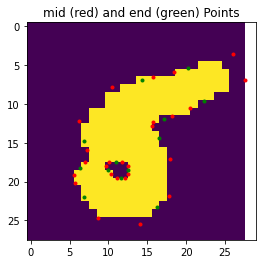

In [32]:
plt.imshow(bw)
#list_of_control_points = []
# Iterate over path curves
for curve in path:
    for segment in curve:
        # M
        if segment.is_corner:
            # L
            #list_of_control_points.append((segment.c[0],segment.c[1]))
            #list_of_control_points.append((segment.end_point[0],segment.end_point[1]))
            print("got a corner")
        else:
            # C
            #list_of_control_points.append((segment.c1[0],segment.c1[1]))
            #list_of_control_points.append((segment.c2[0],segment.c2[1]))
            plt.plot(segment.c1[0]-0.5,segment.c1[1]-0.5,marker = ".",color = "r")
            plt.plot(segment.c2[0]-0.5,segment.c2[1]-0.5,marker = ".",color = "r")
            #list_of_control_points.append((segment.end_point[0],segment.end_point[1]))
            plt.plot(segment.end_point[0]-0.5,segment.end_point[1]-0.5,marker = ".",color = "g")
    # Z
plt.title("mid (red) and end (green) Points")

# 2. Try attention map
* Question. This attention map is computed based on which model?
    
    From *predictor.model load based on config.py*
    
* Only the method *input_reshape_and_normalize_images* from *attention_maps.py* was used, but other 4000 lines was unused...

(100, 28, 28)
(100, 28, 28)
255
0.9999928
0.033046715


(-0.5, 195.5, 55.5, -0.5)

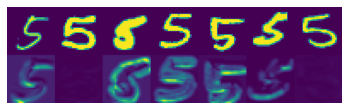

In [72]:
from attention_manager import AttentionManager
print(x_test.shape)
attention = AttentionManager()
xai_imgs = attention.compute_attention_maps(x_test)

print(attention.score)

print(xai_imgs.shape)

num_img = 7
composite_img = np.zeros((28*2, 28*num_img))
for i in range(num_img):
    
    composite_img[0:28,28*i:28*(i+1)] = x_test[i]/256
    composite_img[28:,28*i:28*(i+1)] = xai_imgs[i]
print(x_test.max())
print(xai_imgs.max())
print(xai_imgs[1].max())
plt.imshow(composite_img)
plt.axis("off")

Some attention maps is missing, since its pixels are really low somehow...

0.033046715
0.041311584


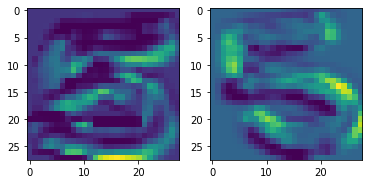

In [78]:
plt.subplot(1,2,1)
plt.imshow(xai_imgs[1])
print(xai_imgs[1].max())
plt.subplot(1,2,2)
plt.imshow(xai_imgs[6])
print(xai_imgs[6].max())

# 3. Try mutation

In [93]:
from predictor import Predictor
# predict something
for img_id in range(20):
    x_temp =  np.reshape(x_test[img_id], (-1, 28, 28, 1))
    print(Predictor.predict_single(x_temp,y_test[img_id]))
    

(5, 1.0)
(5, 1.0)
(8, -1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)
(5, 1.0)


Mutation file
```python
mutation_manager.mutate()
mutation_manager.generate()
```
are called in 
```python
digit_mutation.py
```
"mutate" mutates one coordinate of vertex in one image
"generate" generates a pair of images based on one image



Parameters:
```python
# MUTATION_TYPE = "random"
MUTATION_TYPE = "attention-based"
# range of the mutation
MUTLOWERBOUND = 0.01
MUTUPPERBOUND = 0.6
# mutation operator probability
MUTOPPROB = 0.5
MUTOFPROB = 0.5
```

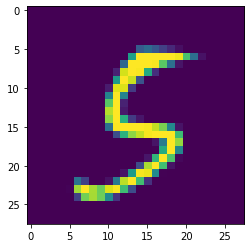

In [120]:
from main import generate_digit
from digit_mutator import DigitMutator
seed = 0
mnist_original = generate_digit(seed)# create Mnist member based on the seed and x_test
digit1, digit2, distance_inputs = DigitMutator(generate_digit(seed)).generate()
plt.imshow(mnist_original.purified.reshape(28, 28))

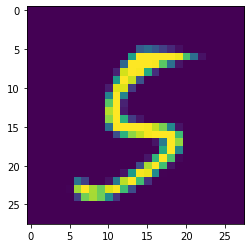

In [121]:
plt.imshow(digit1.purified.reshape(28, 28))

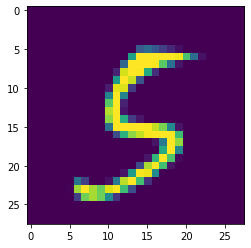

In [122]:
plt.imshow(digit2.purified.reshape(28, 28))

* These two generated graphs look very similiar but criterion in DigitMutator.generate() is the difference between the two graphs larger than 0. 
* 50% with operator1 and 50% with operator2, which are two different patterns
 * operator1 changes all vertexs marked with "[MCLZ]"
 * operator2 changes only vertex marked with "M"
* select a vertex and apply displacement of 

```
+/- uniform(MUTLOWERBOUND, MUTUPPERBOUND) 
```

In [123]:
from utils import get_distance
print(get_distance(digit1.purified,digit2.purified))
print(get_distance(mnist_original.purified,digit1.purified))
print(get_distance(mnist_original.purified,digit2.purified))

0.019996155
0.009605842
0.011091873


## Attention-based mutation
Weights and probabilities are calculated for each vertex in SVG.
Note here weight is based on the sum of the pixel values in the square area centered on the vertex. Moreover the size of square is fixed 3 or 5. 
TO-DO: Let's try some more reasonable way... like weighted K-means.


